# Import Library

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import textwrap

from IPython.display import Markdown

# Data Preparation and Cleaning

In [2]:
df = pd.read_csv("data.csv", encoding='utf-8', sep=';')
df.head()

,univ_name,alias,address,sinta_id,pddikti_code,author_number,dept_number,journal_number,sinta_score_overall,sinta_score_3yr,...,gscholar_cited_doc,gscholar_citation_per_researchers,wos_docs,wos_citation,wos_cited_doc,wos_citation_per_researchers,garuda_docs,garuda_citation,garuda_cited_doc,garuda_citation_per_researchers
0,Universitas Andalas,UNAND,"KOTA PADANG - SUMATERA BARAT, ID",394,1006,1.486,137,38,880633,419035,...,17.572,"95,68",86,382.0,34,"0,22",10.356,286.0,181.0,"0,17"
1,Politeknik Perkapalan Negeri Surabaya,PPNS,"KOTA SURABAYA - JAWA TIMUR, ID",550,5014,168.000,19,0,21700,7914,...,1.254,"34,77",7,70.0,5,"0,37",262.000,2.0,2.0,"0,01"
2,Universitas Mercu Buana Yogyakarta,-,"KAB. BANTUL - DAERAH ISTIMEWA YOGYAKARTA, ID",1881,51019,143.000,16,6,23933,6833,...,1.433,"63,01",11,19.0,7,"0,09",414.000,0.0,0.0,0
3,Universitas Muhammadiyah Purworejo,UMPWR,"KAB. PURWOREJO - JAWA TENGAH, ID",51,61025,132.000,16,8,28433,7333,...,2.617,"204,7",0,0.0,0,0,954.000,9.0,3.0,"0,07"
4,Politeknik Kesehatan Kementerian Kesehatan Sur...,POLTEKKES KEMENKES SURABAYA,"KOTA SURABAYA - JAWA TIMUR, ID",4427,405016,262.000,22,5,16872,8562,...,1.302,"32,26",6,2.0,2,"0,01",342.000,0.0,0.0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5349 entries, 0 to 5348
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   univ_name                          5348 non-null   object 
 1   alias                              5349 non-null   object 
 2   address                            5349 non-null   object 
 3   sinta_id                           5349 non-null   int64  
 4   pddikti_code                       5349 non-null   object 
 5   author_number                      5349 non-null   float64
 6   dept_number                        5349 non-null   int64  
 7   journal_number                     5349 non-null   int64  
 8   sinta_score_overall                5349 non-null   int64  
 9   sinta_score_3yr                    5349 non-null   int64  
 10  sinta_score_productivity           5349 non-null   float64
 11  sinta_score_productivity_3yr       5349 non-null   int64

In [4]:
df.isnull().sum()

univ_name                            1
alias                                0
address                              0
sinta_id                             0
pddikti_code                         0
author_number                        0
dept_number                          0
journal_number                       0
sinta_score_overall                  0
sinta_score_3yr                      0
sinta_score_productivity             0
sinta_score_productivity_3yr         0
scopus_docs                          0
scopus_citation                      0
scopus_cited_doc                     0
scopus_citation_per_researchers      0
gscholar_docs                        0
gscholar_citation                    0
gscholar_cited_doc                   0
gscholar_citation_per_researchers    0
wos_docs                             0
wos_citation                         0
wos_cited_doc                        0
wos_citation_per_researchers         0
garuda_docs                          0
garuda_citation          

In [5]:
df.columns

Index(['univ_name', 'alias', 'address', 'sinta_id', 'pddikti_code',
       'author_number', 'dept_number', 'journal_number', 'sinta_score_overall',
       'sinta_score_3yr', 'sinta_score_productivity',
       'sinta_score_productivity_3yr', 'scopus_docs', 'scopus_citation',
       'scopus_cited_doc', 'scopus_citation_per_researchers', 'gscholar_docs',
       'gscholar_citation', 'gscholar_cited_doc',
       'gscholar_citation_per_researchers', 'wos_docs', 'wos_citation',
       'wos_cited_doc', 'wos_citation_per_researchers', 'garuda_docs',
       'garuda_citation', 'garuda_cited_doc',
       'garuda_citation_per_researchers'],
      dtype='object')

In [6]:
df.shape

(5349, 28)

In [7]:
Markdown("""
1. There are 5349 rows and 28 columns
2. The columns as follows:\n
    {columns}
""".format(columns=df.columns))


1. There are 5349 rows and 28 columns
2. The columns as follows:

    Index(['univ_name', 'alias', 'address', 'sinta_id', 'pddikti_code',
       'author_number', 'dept_number', 'journal_number', 'sinta_score_overall',
       'sinta_score_3yr', 'sinta_score_productivity',
       'sinta_score_productivity_3yr', 'scopus_docs', 'scopus_citation',
       'scopus_cited_doc', 'scopus_citation_per_researchers', 'gscholar_docs',
       'gscholar_citation', 'gscholar_cited_doc',
       'gscholar_citation_per_researchers', 'wos_docs', 'wos_citation',
       'wos_cited_doc', 'wos_citation_per_researchers', 'garuda_docs',
       'garuda_citation', 'garuda_cited_doc',
       'garuda_citation_per_researchers'],
      dtype='object')


In [8]:
# replace a few data on 'address' to certain string, needed for the feature extraction
df['address'] = df['address'].apply(lambda x: x.replace('UNKNOWN - UNKNOWN', '- - -'))

## Feature Engineering: Extract Province and City by 'address'

In [9]:
# create a function to extract subtring 
def extract_substr(text, mode):
    # split to substring if symbol '-' is exist    
    string = text.split('-', 1)
    
    # assign city as the subtring before symbol '-' and province after symbol '-'   
    city = string[0]
    province = string[1]
    province = province.split(',', 1)
    province = province[0].replace(' - ', '')
    
    # if string is empty, then set as None
    if city == "":
        city = None
        
    if province == "-":
        province = None
    
    # conditions for    
    if mode == 0:
        return city
    else:
        return province

In [10]:
# extract 'city' and 'province' by apply function
df['city'] = df['address'].apply(lambda x: extract_substr(x, 0))
df['province'] = df['address'].apply(lambda x: extract_substr(x, 1))

In [11]:
df['city']

0                   KOTA PADANG 
1                 KOTA SURABAYA 
2                   KAB. BANTUL 
3                KAB. PURWOREJO 
4                 KOTA SURABAYA 
                  ...           
5344              KOTA SURABAYA 
5345    KOTA ADM. JAKARTA BARAT 
5346            KOTA YOGYAKARTA 
5347                KAB. SLEMAN 
5348               KAB. BANDUNG 
Name: city, Length: 5349, dtype: object

In [12]:
df['province']

0                    SUMATERA BARAT
1                        JAWA TIMUR
2        DAERAH ISTIMEWA YOGYAKARTA
3                       JAWA TENGAH
4                        JAWA TIMUR
                   ...             
5344                     JAWA TIMUR
5345                    DKI JAKARTA
5346     DAERAH ISTIMEWA YOGYAKARTA
5347     DAERAH ISTIMEWA YOGYAKARTA
5348                     JAWA BARAT
Name: province, Length: 5349, dtype: object

## Feature Engineering: Extract Total Citation based on Number of Citations on Scopus, Google Scholar, Web of Science, and Garuda

In [13]:
df['total_citation'] =  df[['scopus_citation', 'gscholar_citation', 'wos_citation', 'garuda_citation']].sum(axis=1)
df['total_citation']

0       164983.289
1         6679.501
2        13315.000
3        27580.000
4         8892.000
           ...    
5344    275418.388
5345    121642.594
5346    752950.691
5347    418325.160
5348    136574.267
Name: total_citation, Length: 5349, dtype: float64

## Feature Engineering: Extract Total Publication based on Number of Docs on Scopus, Google Scholar, Web of Science, and Garuda

In [14]:
df['total_publication'] =  df[['scopus_docs', 'gscholar_docs', 'wos_docs', 'garuda_docs']].sum(axis=1)
df['total_publication']

0        145.456
1        609.287
2        510.870
3       1053.183
4        624.000
          ...   
5344     251.510
5345      80.367
5346     104.621
5347     155.015
5348     188.189
Name: total_publication, Length: 5349, dtype: float64

# Outlier Handling: Interquartile Rule (IQR) Implementation

## Function to Handling Outiers using IQR Method

In [15]:
import warnings
warnings.filterwarnings('ignore')

# create iqr function
def iqr(df, col):

    # initialize quartile 1 and quartile 3
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)

    # initialize iqr, upper_limit, and lower_limit
    iqr = q3 - q1
    upper_limit = q3 + 1.5 * iqr
    lower_limit = q1 - 1.5 * iqr

    # capping
    new_df_cap = df.copy()
    new_df_cap[col] = np.where(
        new_df_cap[col] > upper_limit,
        upper_limit,
        np.where(
            new_df_cap[col] < lower_limit,
            lower_limit,
            new_df_cap[col]
        )
    )
    return new_df_cap

In [16]:
chart = 'SINTA Score Overall Distribution'

Markdown("""
### {title}
""".format(title=chart))


### SINTA Score Overall Distribution


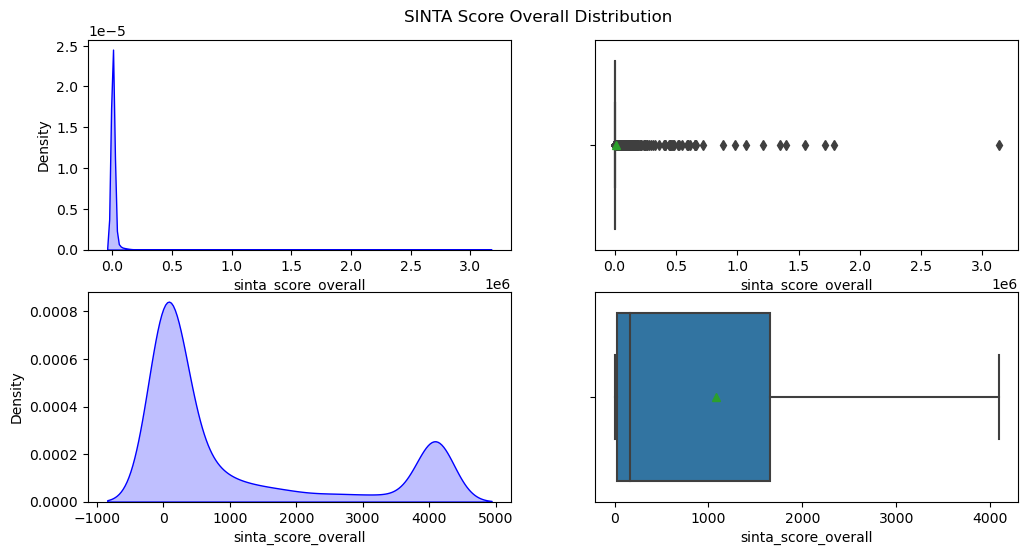

In [17]:
sinta_ovr_cap = iqr(df, 'sinta_score_overall')

plt.figure(figsize=(12,6))
plt.suptitle(f'{chart}', y=0.93)
plt.subplot(2,2,1)
sns.kdeplot(df.sinta_score_overall, color="Blue", shade = True)
plt.subplot(2,2,2)
sns.boxplot(df['sinta_score_overall'], showmeans=True)
plt.subplot(2,2,3)
sns.kdeplot(sinta_ovr_cap.sinta_score_overall, color="Blue", shade = True)
plt.subplot(2,2,4)
sns.boxplot(sinta_ovr_cap['sinta_score_overall'], showmeans=True)
plt.show()

In [18]:
chart = 'SINTA 3yr Score Distribution'

Markdown("""
### {title}
""".format(title=chart))


### SINTA 3yr Score Distribution


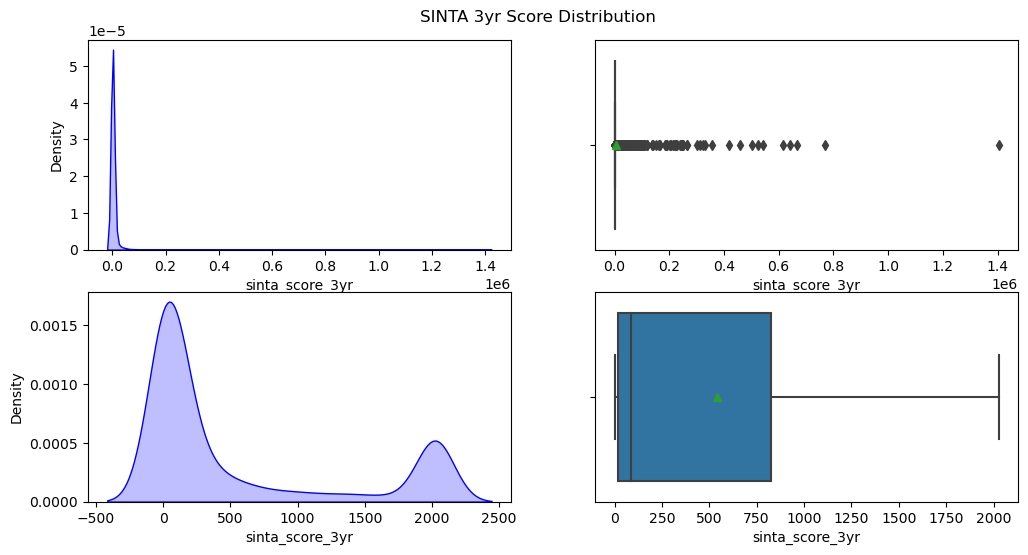

In [19]:
sinta3yr_cap = iqr(df, 'sinta_score_3yr')

plt.figure(figsize=(12,6))
plt.suptitle(f'{chart}', y=0.93)
plt.subplot(2,2,1)
sns.kdeplot(df.sinta_score_3yr, color="Blue", shade = True)
plt.subplot(2,2,2)
sns.boxplot(df['sinta_score_3yr'], showmeans=True)
plt.subplot(2,2,3)
sns.kdeplot(sinta3yr_cap.sinta_score_3yr, color="Blue", shade = True)
plt.subplot(2,2,4)
sns.boxplot(sinta3yr_cap['sinta_score_3yr'], showmeans=True)
plt.show()

# Exploratory Data Analysis and Visualization

In [20]:
chart = 'Top 10 Provinces by Number of Institutions'

Markdown("""
### {title}
""".format(title=chart))


### Top 10 Provinces by Number of Institutions


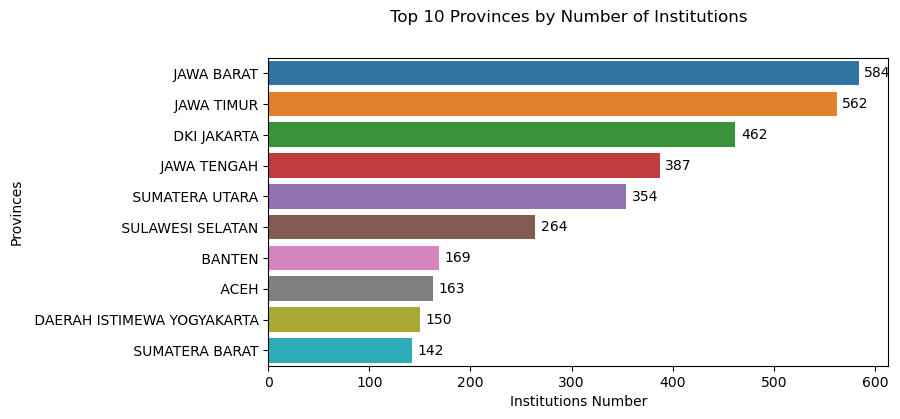

In [21]:
plt.figure(figsize=(8, 4))

plt.suptitle(f'{chart}', y=1)

# plot data to visualize the top 10 provinces by number of institutions. head(10) --> get top 10 from the data. 
g = sns.countplot(y="province", data = df, order = df['province'].value_counts().head(10).index)
g.set(ylabel='Provinces', xlabel='Institutions Number')

for container in g.containers:
    g.bar_label(container, padding=4)
    
plt.show()

In [22]:
chart = 'Top 10 Cities by Number of Institutions'

Markdown("""
### {title}
""".format(title=chart))


### Top 10 Cities by Number of Institutions


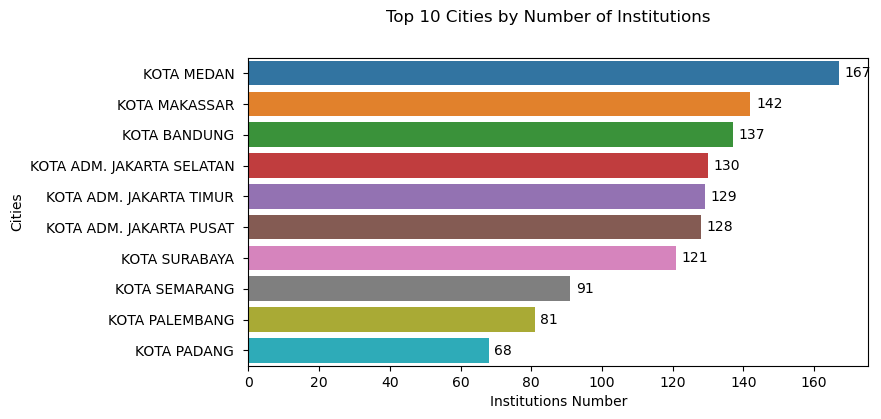

In [23]:
plt.figure(figsize=(8, 4))

plt.suptitle(f'{chart}', y=1)

# plot data to visualize the top 10 cities by number of institutions. head(10) --> get top 10 from the data. 
g = sns.countplot(y="city", data = df, order = df['city'].value_counts().head(10).index)
g.set(ylabel='Cities', xlabel='Institutions Number')

for container in g.containers:
    g.bar_label(container, padding=4)
    
plt.show()

## Function to Get the Statistical Data

In [24]:
# define extract_stast function to get the stats data(sum, median, mean, modus)
def extract_stats(data, column, column2, method, number):
    
    # group data by 'column', get stats data, and reset_index(needed for sorting data)   
    if method == "sum":
        data_final = data.groupby(column)[column2].sum().reset_index()
    elif method == "median":
        data_final = data.groupby(column)[column2].median().reset_index()
    elif method == "mean":
        data_final = data.groupby(column)[column2].mean().reset_index()
    elif method == "modus":
        data_final = data.groupby(column)[column2].modus().reset_index()
    
    # sort the data by 'column2' to descending and get the top data from 'number' 
    sorted_data = data_final.sort_values(by=column2, ascending=False).head(number)
    return sorted_data

In [25]:
chart = 'Top 10 Provinces by Number of Authors'

Markdown("""
### {title}
""".format(title=chart))


### Top 10 Provinces by Number of Authors


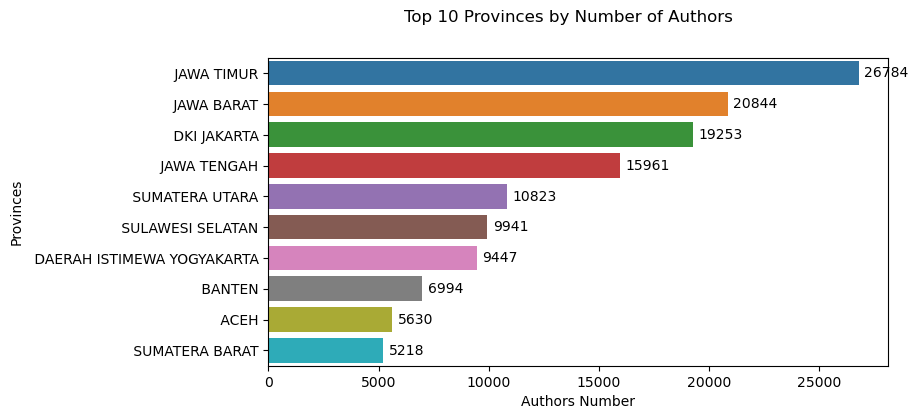

In [26]:
plt.figure(figsize=(8, 4))

plt.suptitle(f'{chart}', y=1)

# extract the data to get top 10 provinces by author number based on df
top10prov_author = extract_stats(df, 'province', 'author_number', 'sum', 10)

# plot data to visualize the top 10 provinces by number of authors. 
g = sns.barplot(x="author_number", y="province", data = top10prov_author)
g.set(ylabel='Provinces', xlabel='Authors Number')

for container in g.containers:
    g.bar_label(container, padding=4, fmt='%.0f')
    
plt.show()

In [27]:
chart = 'Top 10 Cities by Number of Authors'

Markdown("""
### {title}
""".format(title=chart))


### Top 10 Cities by Number of Authors


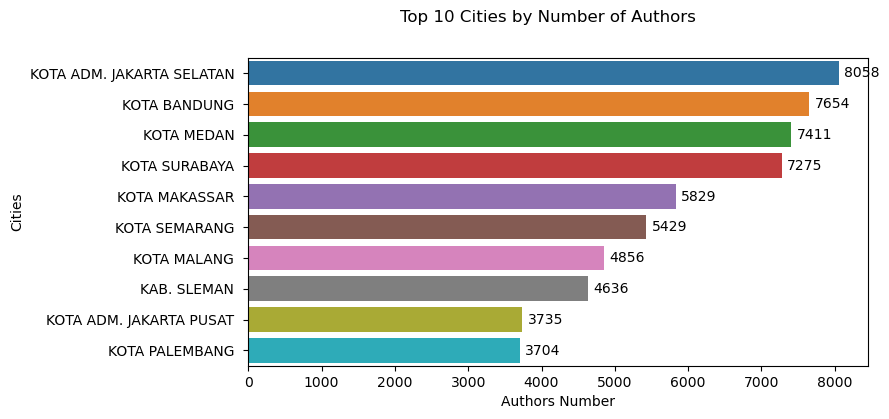

In [28]:
plt.figure(figsize=(8, 4))

plt.suptitle(f'{chart}', y=1)

# extract the data to get top 10 cities by author number based on df
top10city_author = extract_stats(df, 'city', 'author_number', 'sum', 10)

# plot data to visualize the top 10 provinces by number of authors. 
g = sns.barplot(x="author_number", y="city", data = top10city_author)
g.set(ylabel='Cities', xlabel='Authors Number')

for container in g.containers:
    g.bar_label(container, padding=4, fmt='%.0f')
    
plt.show()

In [29]:
chart = 'Top 10 Provinces by Number of Journals'

Markdown("""
### {title}
""".format(title=chart))


### Top 10 Provinces by Number of Journals


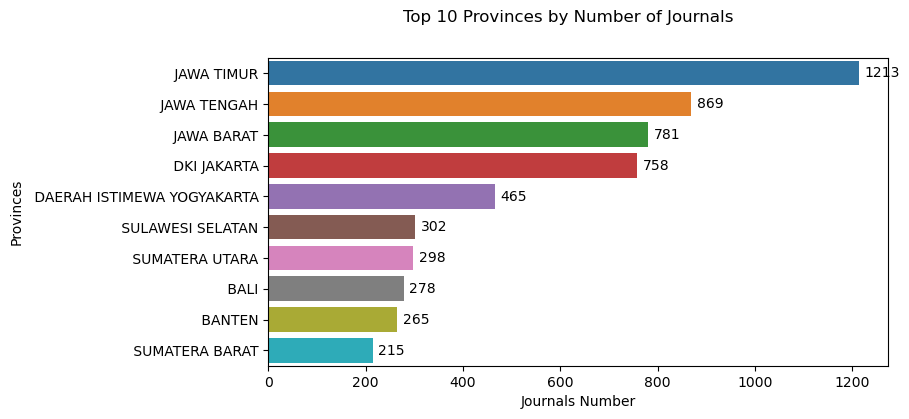

In [30]:
plt.figure(figsize=(8, 4))

plt.suptitle(f'{chart}', y=1)

# extract the data to get top 10 provinces by journal number based on df
top10prov_journal = extract_stats(df, 'province', 'journal_number', 'sum', 10)

# plot data to visualize the top 10 provinces by number of journals.
g = sns.barplot(x="journal_number", y="province", data = top10prov_journal)
g.set(ylabel='Provinces', xlabel='Journals Number')

for container in g.containers:
    g.bar_label(container, padding=4, fmt='%.0f')
    
plt.show()

In [31]:
chart = 'Top 10 Cities by Number of Journals'

Markdown("""
### {title}
""".format(title=chart))


### Top 10 Cities by Number of Journals


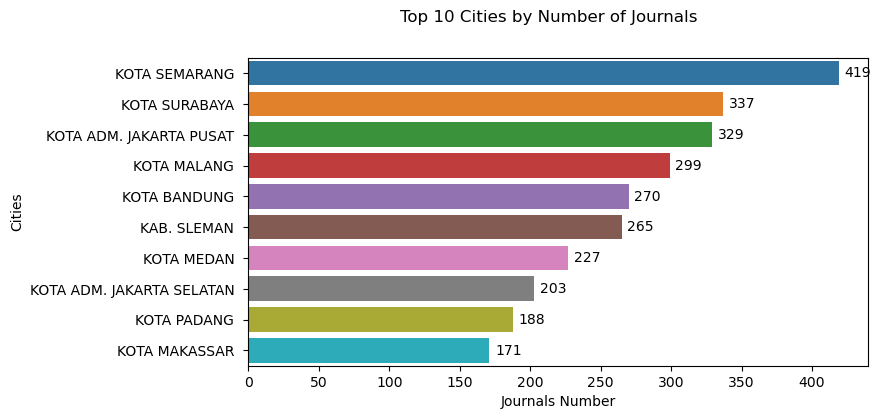

In [32]:
plt.figure(figsize=(8, 4))

plt.suptitle(f'{chart}', y=1)

# extract the data to get top 10 cities by journal number based on df
top10city_journal = extract_stats(df, 'city', 'journal_number', 'sum', 10)

# plot data to visualize the top 10 cities by number of journals.
g = sns.barplot(x="journal_number", y="city", data = top10city_journal)
g.set(ylabel='Cities', xlabel='Journals Number')

for container in g.containers:
    g.bar_label(container, padding=4, fmt='%.0f')
    
plt.show()

In [33]:
# defining wrap_labels for wrapping a few of labels that overidding the chart
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width, 
                                    break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

In [34]:
chart = 'Top 5 Institutions by SINTA Score Overall'

Markdown("""
### {title}
""".format(title=chart))


### Top 5 Institutions by SINTA Score Overall


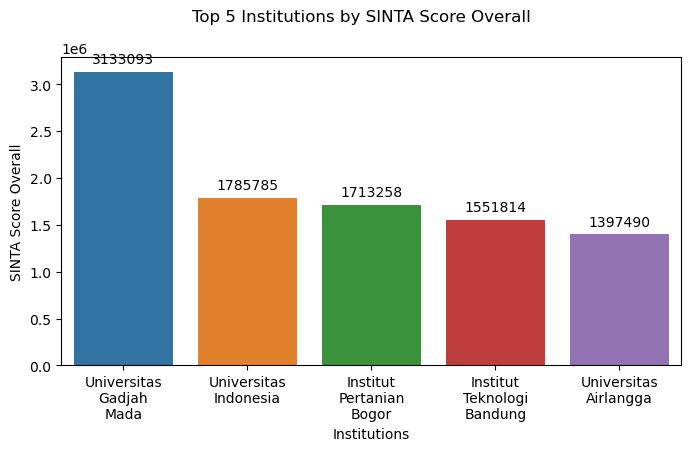

In [35]:
plt.figure(figsize=(8, 4))

plt.suptitle(f'{chart}', y=1)

# sort the data and get top 5 by 'sinta_score_overall'
top5ins_sinta_ovr = df.sort_values(by='sinta_score_overall', ascending=False).head(5)

# plot data to visualize the top 5 institutions by SINTA Score Overall.
g = sns.barplot(y="sinta_score_overall", x="univ_name", data = top5ins_sinta_ovr)
g.set(xlabel='Institutions', ylabel='SINTA Score Overall')
wrap_labels(g, 10)

for container in g.containers:
    g.bar_label(container, padding=4, fmt='%.0f')
    
plt.show()

In [36]:
chart = 'Top 5 Institutions by SINTA 3yr Score'

Markdown("""
### {title}
""".format(title=chart))


### Top 5 Institutions by SINTA 3yr Score


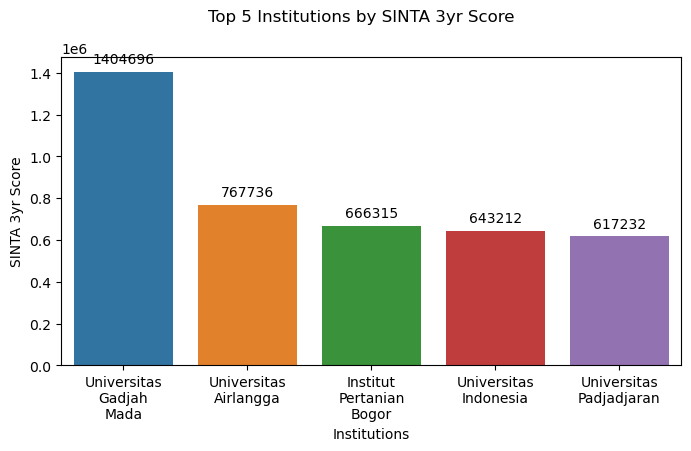

In [37]:
plt.figure(figsize=(8, 4))

plt.suptitle(f'{chart}', y=1)

# sort the data and get top 5 by 'sinta_score_3yr’
top5ins_sinta3yr = df.sort_values(by='sinta_score_3yr', ascending=False).head(5)

# plot data to visualize the top 5 institutions by SINTA Score 3yr.
g = sns.barplot(y="sinta_score_3yr", x="univ_name", data = top5ins_sinta3yr)
g.set(xlabel='Institutions', ylabel='SINTA 3yr Score')
wrap_labels(g, 10)

for container in g.containers:
    g.bar_label(container, padding=4, fmt='%.0f')
    
plt.show()

In [38]:
chart = 'Top 5 Institutions by SINTA Score Productivity 3yr'

Markdown("""
### {title}
""".format(title=chart))


### Top 5 Institutions by SINTA Score Productivity 3yr


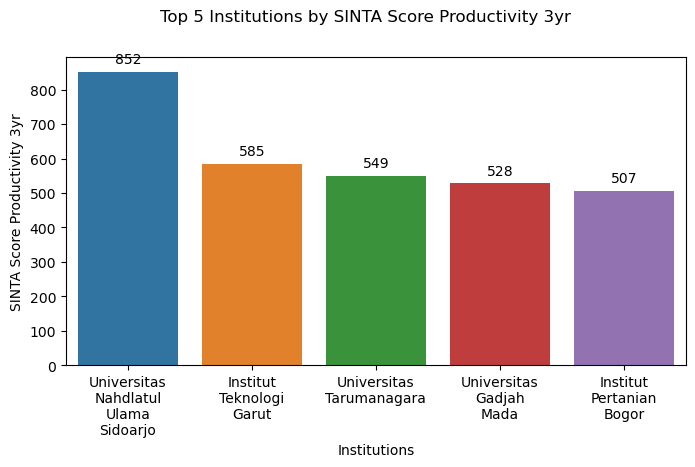

In [39]:
plt.figure(figsize=(8, 4))

plt.suptitle(f'{chart}', y=1)

# sort the data and get top 5 by 'sinta_score_productivity_3yr’
top5ins_sintaprod3yr = df.sort_values(by='sinta_score_productivity_3yr', ascending=False).head(5)

# plot data to visualize the top 5 institutions by SINTA Score Productivity 3yr.
g = sns.barplot(y="sinta_score_productivity_3yr", x="univ_name", data = top5ins_sintaprod3yr)
g.set(xlabel='Institutions', ylabel='SINTA Score Productivity 3yr')
wrap_labels(g, 10)

for container in g.containers:
    g.bar_label(container, padding=4, fmt='%.0f')
    
plt.show()

In [40]:
chart = 'Top 10 Provinces by SINTA Score Overall (Median)'

Markdown("""
### {title}
""".format(title=chart))


### Top 10 Provinces by SINTA Score Overall (Median)


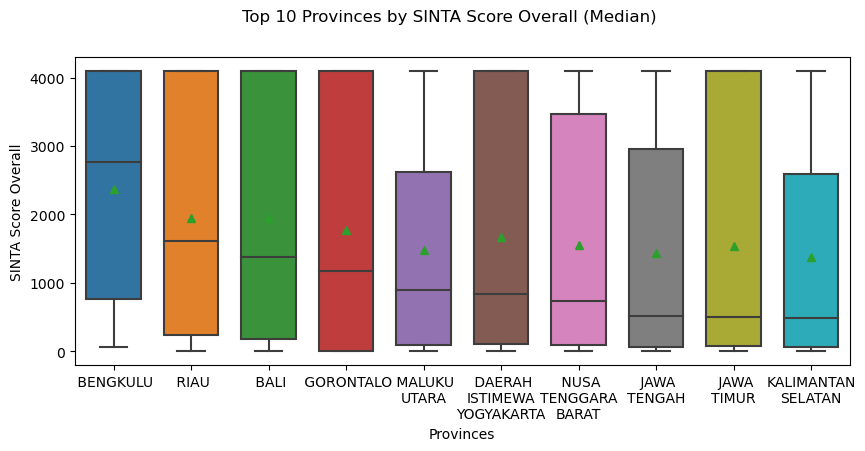

In [41]:
plt.figure(figsize=(10, 4))
plt.tight_layout()
plt.tight_layout(pad=4)

plt.suptitle(f'{chart}', y=1)

# extract the data to get top 10 provinces by SINTA Score Overall based on sinta_ovr_cap
top10prov_sintaovr = extract_stats(sinta_ovr_cap, 'province', 'sinta_score_overall', 'median', 10)

# plot data to visualize the top 10 provinces by SINTA Score Overall.
g = sns.boxplot(y="sinta_score_overall", x="province", data = sinta_ovr_cap, order=top10prov_sintaovr["province"], width=0.70, showmeans=True)
g.set(xlabel='Provinces', ylabel='SINTA Score Overall')
wrap_labels(g, 10)
    
plt.show()

This chart is visualized based on the median value of the SINTA Score Overall. Using the median is because the median value tends to be better at representing data that has extreme values or large outliers. Compared if the average/mean or sum/sum values are used will cause a biased analysis. To avoid this, the median value is used to determine the best category in this context, the best province based on the SINTA Score Overall.

In [42]:
chart = 'Top 10 Provinces by SINTA 3yr Score (Median)'

Markdown("""
### {title}
""".format(title=chart))


### Top 10 Provinces by SINTA 3yr Score (Median)


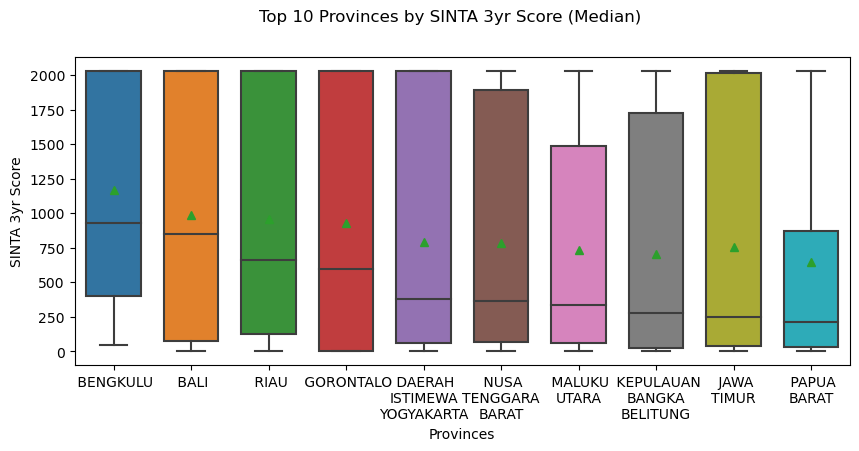

In [43]:
plt.figure(figsize=(10, 4))
plt.tight_layout()
plt.tight_layout(pad=4)

plt.suptitle(f'{chart}', y=1)

# extract the data to get top 10 provinces by SINTA Score 3yr based on sinta3yr_cap
top10prov_sinta3yr = extract_stats(sinta3yr_cap, 'province', 'sinta_score_3yr', 'median', 10)

# plot data to visualize the top 10 provinces by SINTA Score 3yr.
g = sns.boxplot(y="sinta_score_3yr", x="province", data = sinta3yr_cap, order=top10prov_sinta3yr["province"], width=0.70, showmeans=True)
g.set(xlabel='Provinces', ylabel='SINTA 3yr Score')
wrap_labels(g, 10)
    
plt.show()

This chart is visualized based on the median value of the SINTA Score 3yr. Using the median is because the median value tends to be better at representing data that has extreme values or large outliers. Compared if the average/mean or sum/sum values are used will cause a biased analysis. To avoid this, the median value is used to determine the best category in this context, the best province based on the SINTA Score 3yr.

In [44]:
chart = 'Top 10 Cities by SINTA Score Overall'

Markdown("""
### {title}
""".format(title=chart))


### Top 10 Cities by SINTA Score Overall


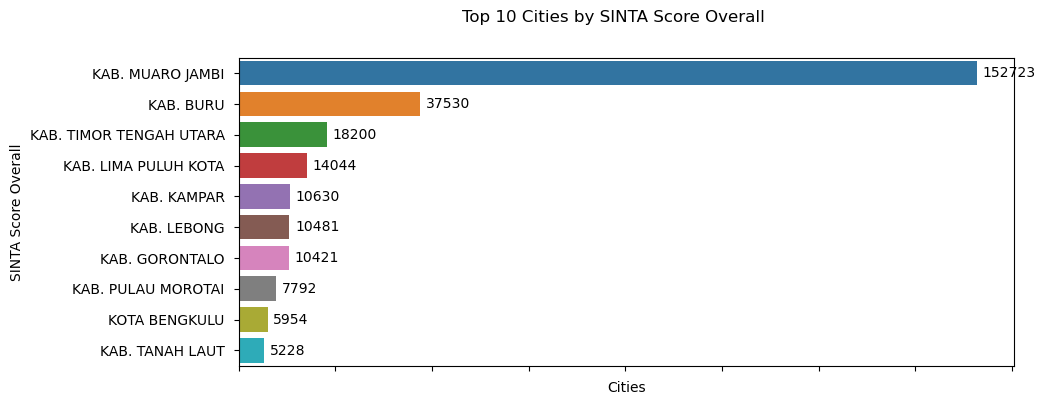

In [45]:
plt.figure(figsize=(10, 4))
plt.tight_layout()
plt.tight_layout(pad=4)

plt.suptitle(f'{chart}', y=1)

# extract the data to get top 10 cities by SINTA Score Overall based on df
top10city_sintaovr = extract_stats(df, 'city', 'sinta_score_overall', 'median', 10)

# plot data to visualize the top 10 cities by SINTA Score Overall.
g = sns.barplot(x="sinta_score_overall", y="city", data = top10city_sintaovr)
g.set(xlabel='Cities', ylabel='SINTA Score Overall')
wrap_labels(g, 10)

for container in g.containers:
    g.bar_label(container, padding=4, fmt='%.0f')
    
plt.show()

In [46]:
chart = 'Top 10 Cities by SINTA 3yr Score'

Markdown("""
### {title}
""".format(title=chart))


### Top 10 Cities by SINTA 3yr Score


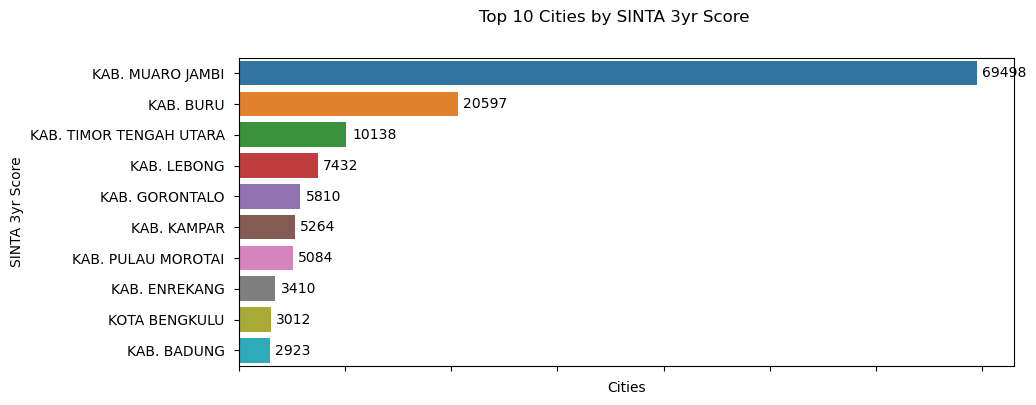

In [47]:
plt.figure(figsize=(10, 4))
plt.tight_layout()
plt.tight_layout(pad=4)

plt.suptitle(f'{chart}', y=1)

# extract the data to get top 10 cities by SINTA Score 3yr based on df
top10city_sinta3yr = extract_stats(df, 'city', 'sinta_score_3yr', 'median', 10)

# plot data to visualize the top 10 citis by SINTA Score 3yr.
g = sns.barplot(x="sinta_score_3yr", y="city", data = top10city_sinta3yr)
g.set(xlabel='Cities', ylabel='SINTA 3yr Score')
wrap_labels(g, 10)

for container in g.containers:
    g.bar_label(container, padding=4, fmt='%.0f')
    
plt.show()

In [48]:
chart = 'Top 10 Provinces by Total Citations (Scopus, Google Scholar, WOS, and Garuda)'

Markdown("""
### {title}
""".format(title=chart))


### Top 10 Provinces by Total Citations (Scopus, Google Scholar, WOS, and Garuda)


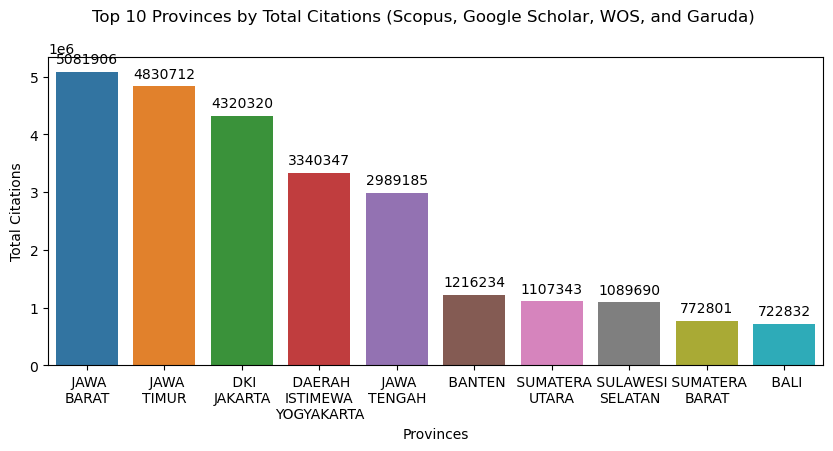

In [49]:
plt.figure(figsize=(10, 4))
plt.tight_layout()
plt.tight_layout(pad=4)

plt.suptitle(f'{chart}', y=1)

# extract the data to get top 10 provinces by total citations based on df
top10prov_cit = extract_stats(df, 'province', 'total_citation', 'sum', 10)

# plot data to visualize the top 10 provinces by total citations.
g = sns.barplot(y="total_citation", x="province", data = top10prov_cit)
g.set(xlabel='Provinces', ylabel='Total Citations')
wrap_labels(g, 10)

for container in g.containers:
    g.bar_label(container, padding=4, fmt='%.0f')
    
plt.show()

In [50]:
chart = 'Top 10 Cities by Total Citations (Scopus, Google Scholar, WOS, and Garuda)'

Markdown("""
### {title}
""".format(title=chart))


### Top 10 Cities by Total Citations (Scopus, Google Scholar, WOS, and Garuda)


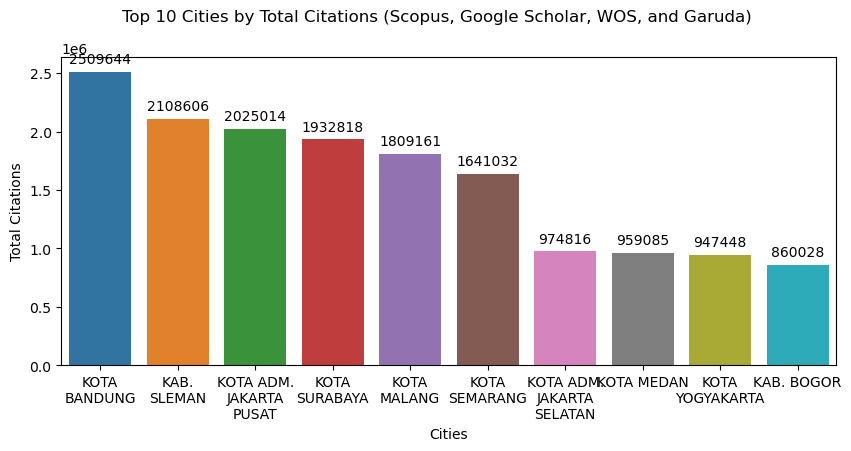

In [51]:
plt.figure(figsize=(10, 4))
plt.tight_layout()
plt.tight_layout(pad=4)

plt.suptitle(f'{chart}', y=1)

# extract the data to get top 10 cities by total citations based on df
top10city_cit = extract_stats(df, 'city', 'total_citation', 'sum', 10)

# plot data to visualize the top 10 cities by total citations.
g = sns.barplot(y="total_citation", x="city", data = top10city_cit)
g.set(xlabel='Cities', ylabel='Total Citations')
wrap_labels(g, 10)

for container in g.containers:
    g.bar_label(container, padding=4, fmt='%.0f')
    
plt.show()

In [52]:
chart = 'Top 10 Provinces by Total Publications (Scopus, Google Scholar, WOS, and Garuda)'

Markdown("""
### {title}
""".format(title=chart))


### Top 10 Provinces by Total Publications (Scopus, Google Scholar, WOS, and Garuda)


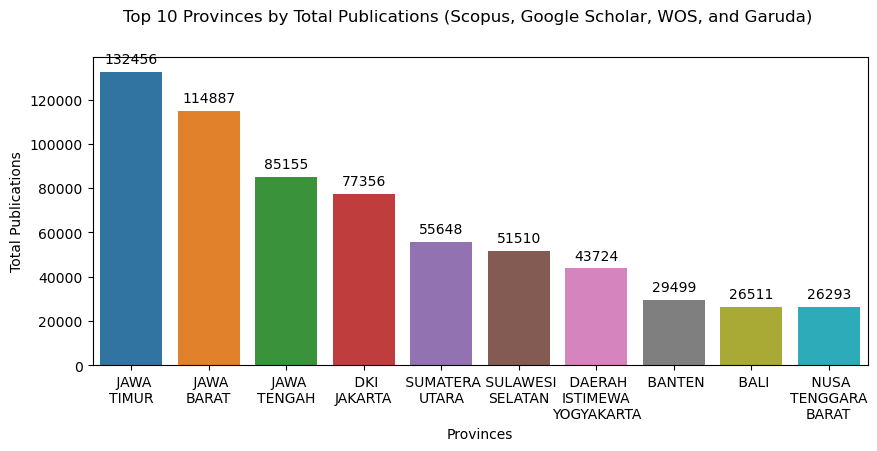

In [53]:
plt.figure(figsize=(10, 4))
plt.tight_layout()
plt.tight_layout(pad=4)

plt.suptitle(f'{chart}', y=1)

# extract the data to get top 10 provinces by total publications based on df
top10prov_pub = extract_stats(df, 'province', 'total_publication', 'sum', 10)

# plot data to visualize the top 10 provinces by total publications.
g = sns.barplot(y="total_publication", x="province", data = top10prov_pub)
g.set(xlabel='Provinces', ylabel='Total Publications')
wrap_labels(g, 10)

for container in g.containers:
    g.bar_label(container, padding=4, fmt='%.0f')
    
plt.show()

In [54]:
chart = 'Top 10 Cities by Total Publications (Scopus, Google Scholar, WOS, and Garuda)'

Markdown("""
### {title}
""".format(title=chart))


### Top 10 Cities by Total Publications (Scopus, Google Scholar, WOS, and Garuda)


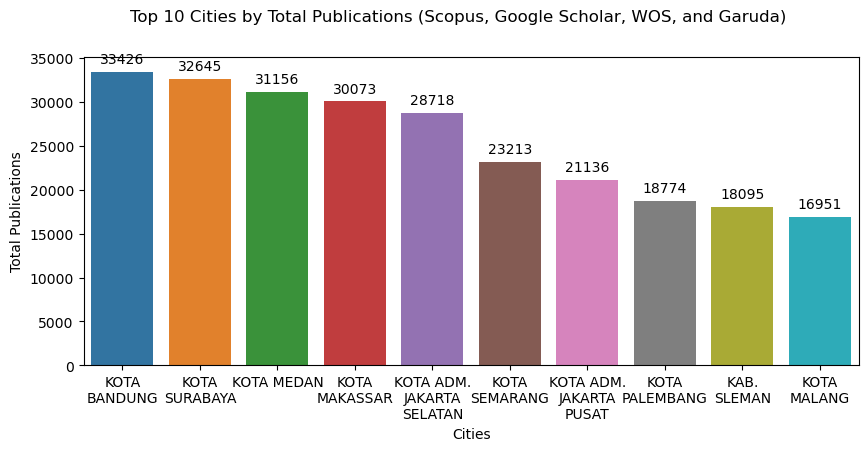

In [55]:
plt.figure(figsize=(10, 4))
plt.tight_layout()
plt.tight_layout(pad=4)

plt.suptitle(f'{chart}', y=1)

# extract the data to get top 10 cities by total publications based on df
top10city_pub = extract_stats(df, 'city', 'total_publication', 'sum', 10)

# plot data to visualize the top 10 cities by total publications.
g = sns.barplot(y="total_publication", x="city", data = top10city_pub)
g.set(xlabel='Cities', ylabel='Total Publications')
wrap_labels(g, 10)

for container in g.containers:
    g.bar_label(container, padding=4, fmt='%.0f')
    
plt.show()